In [2]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from pandas import DataFrame
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.api import anova_lm
from statsmodels.formula.api import ols

# Read Data

In [56]:
battles = pd.read_csv('./gameofthrones/battles.csv', index_col = 0, header = 0)
deaths = pd.read_csv('./gameofthrones/character_deaths.csv', index_col = 0, header = 0)
predictions = pd.read_csv('./gameofthrones/character_predictions.csv', index_col = 0, header = 0)

In [21]:
print("Battles columns:\n", battles.columns, "\n", "\n",
      "Deaths columns: \n",deaths.columns, "\n", "\n",
      "Predictions columns:\n", predictions.columns)

Battles columns:
 Index(['year', 'battle_number', 'attacker_king', 'defender_king', 'attacker_1',
       'attacker_2', 'attacker_3', 'attacker_4', 'defender_1', 'defender_2',
       'defender_3', 'defender_4', 'attacker_outcome', 'battle_type',
       'major_death', 'major_capture', 'attacker_size', 'defender_size',
       'attacker_commander', 'defender_commander', 'summer', 'location',
       'region', 'note'],
      dtype='object') 
 
 Deaths columns: 
 Index(['Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD'],
      dtype='object') 
 
 Predictions columns:
 Index(['actual', 'pred', 'alive', 'plod', 'name', 'title', 'male', 'culture',
       'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir', 'house',
       'spouse', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveMother',
       'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble',
       'age', 'n

In [39]:
battles

,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
name,,,,,,,,,,,,,,,,,,,,,
Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,...,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,NaN,...,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,...,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,...,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN


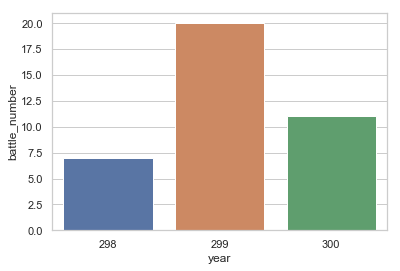

In [45]:
sns.set(style="whitegrid")
bat__per_year = battles.groupby("year").count().reset_index()
sns.barplot(x= "year",y='battle_number', data=bat__per_year)

In [71]:
death_in_battles_per_year= battles.groupby("year")["major_death"].mean()
death_in_battles_per_year
deaths

,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
Name,,,,,,,,,,,,
Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0
Aemon Estermont,Baratheon,NaN,NaN,NaN,NaN,1,1,0,1,1,0,0
Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,1,1,1,0,1,1,0
Aenys Frey,None,300.0,5.0,NaN,59.0,0,1,1,1,1,0,1
Aeron Greyjoy,House Greyjoy,NaN,NaN,NaN,11.0,1,1,0,1,0,1,0


In [72]:
deaths['Death Year'].fillna(0, inplace=True)
death_per_year = deaths.groupby(['Death Year', "Gender"]).count().reset_index()
death_per_year 

,Death Year,Gender,Allegiances,Book of Death,Death Chapter,Book Intro Chapter,Nobility,GoT,CoK,SoS,FfC,DwD
0,0.0,0,121,0,0,121,121,121,121,121,121,121
1,0.0,1,491,2,4,484,491,491,491,491,491,491
2,297.0,1,3,3,3,3,3,3,3,3,3,3
3,298.0,0,3,3,3,3,3,3,3,3,3,3
4,298.0,1,43,43,43,43,43,43,43,43,43,43
5,299.0,0,15,15,15,15,15,15,15,15,15,15
6,299.0,1,141,141,139,139,141,141,141,141,141,141
7,300.0,0,18,18,15,18,18,18,18,18,18,18
8,300.0,1,82,82,77,79,82,82,82,82,82,82


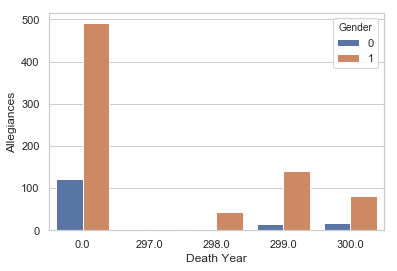

In [74]:
sns.set(style="whitegrid")
sns.barplot(x= 'Death Year',y='Allegiances', hue= "Gender", data=death_per_year)

In [64]:
deaths.groupby(["Gender", "Death Year" ]).count()

Allegiances  Book of Death  Death Chapter  \
Gender Death Year                                              
0      298.0                 3              3              3   
       299.0                15             15             15   
       300.0                18             18             15   
1      297.0                 3              3              3   
       298.0                43             43             43   
       299.0               141            141            139   
       300.0                82             82             77   

                   Book Intro Chapter  Nobility  GoT  CoK  SoS  FfC  DwD  
Gender Death Year                                                         
0      298.0                        3         3    3    3    3    3    3  
       299.0                       15        15   15   15   15   15   15  
       300.0                       18        18   18   18   18   18   18  
1      297.0                        3         3    3    3    3    3    3  
       298.0                       43        43   43   43   43   43   43  
       299.0                      139       141  141  141  141  141  141  
       300.0                       79        82   82   82   82   82   82